In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Import data
# !wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
new_dataset = pd.get_dummies(dataset, columns=['sex', 'smoker', 'region'])
new_dataset.tail()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1333,50,31.0,3,10600.55,False,True,True,False,False,True,False,False
1334,18,31.9,0,2205.98,True,False,True,False,True,False,False,False
1335,18,36.9,0,1629.83,True,False,True,False,False,False,True,False
1336,21,25.8,0,2007.95,True,False,True,False,False,False,False,True
1337,61,29.1,0,29141.36,True,False,False,True,False,True,False,False


In [4]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(new_dataset, test_size=0.2, random_state=42)

In [5]:
train_features = train_set.copy()
test_features = test_set.copy()

In [6]:
len(test_features)

268

In [7]:
train_labels = train_features.pop('expenses')
test_labels = test_features.pop('expenses')

In [8]:
test_features.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,45,25.2,2,True,False,True,False,True,False,False,False
887,36,30.0,0,True,False,True,False,False,True,False,False
890,64,26.9,0,True,False,False,True,False,True,False,False
1293,46,25.7,3,False,True,True,False,False,True,False,False
259,19,31.9,0,False,True,False,True,False,True,False,False


In [9]:
model = RandomForestRegressor()
model.fit(train_features, train_labels)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(test_features)
mae = mean_absolute_error(test_labels, y_pred)

Testing set Mean Abs Error: 2492.15 expenses


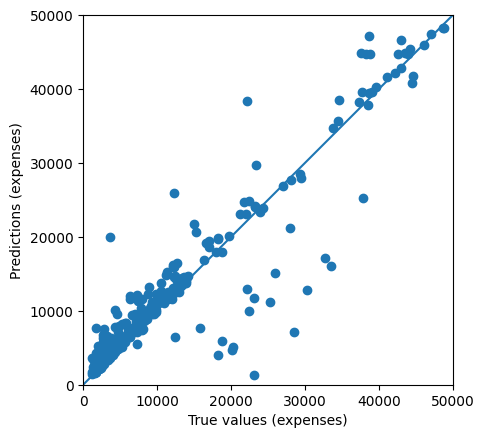

In [11]:
# Test model by checking how well the model generalizes using the test set.
# loss, mae, mse = model.evaluate(test_features, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

# Plot predictions.
test_predictions = model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
